<a href="https://colab.research.google.com/github/KevinEnriquez96/Analogos/blob/master/filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
#%tensorflow_version 1.x
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
#from tensorflow.keras import backend as K
#from statsmodels.tsa.api import SimpleExpSmoothing
#from matplotlib.pylab import rcParams
#from statsmodels.tsa.stattools import adfuller
#import keras
#from keras.layers import Dense , Flatten,BatchNormalization
#from keras.models import Sequential
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.optimizers import Adam
#import itertools

Señales EMG sin filtrar

In [237]:
df=pd.read_csv('sheet2.csv')
#f=pd.read_csv('/content/y.csv')
#df=df.drop(['TIME'],axis=1)
df.head(100)

,atencion,theta,low alp,high alp
0,0,36842,9321,7551
1,54,18982,13971,3953
2,78,8412,4310,2522
3,93,32319,52016,10503
4,97,55030,22454,24308
...,...,...,...,...
95,69,51067,21361,7399
96,77,17161,20184,12289
97,78,13308,19645,9729
98,66,49805,27630,11388


In [240]:
x1 = df.values
xv = x1.reshape(330,4)
df1 = pd.DataFrame(xv)


Gráfica de señales

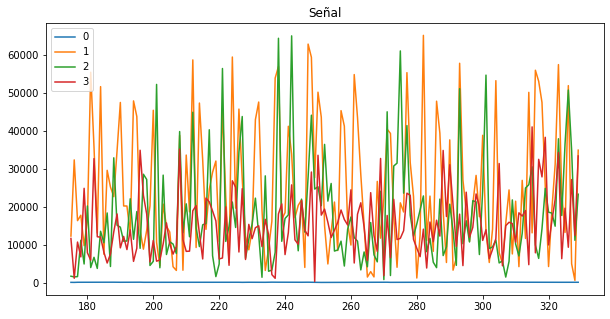

In [241]:
df1[175:350].plot(figsize=(10,5))
#f[2000:4000].plot(figsize=(10,5))
plt.title('Señal')
plt.legend(loc='best')

Análisis de datos

In [242]:
signal1=df['atencion']
signal2=df['theta ']
signal3=df['low alp']
signal4=df['high alp ']
#df1=df.drop(['TIME','EMG2','EMG3'],axis=1)
#df2=df.drop(['TIME','EMG1','EMG3'],axis=1)
#df3=df.drop(['TIME','EMG1','EMG2'],axis=1)

df1=df.drop(['theta ','low alp','high alp '],axis=1)
df2=df.drop(['atencion','low alp','high alp '],axis=1)
df3=df.drop(['atencion','theta ','high alp '],axis=1)
df4=df.drop(['atencion','theta ','low alp'],axis=1)

In [243]:
df[:500].describe()

,atencion,theta,low alp,high alp
count,330.000000,330.000000,330.000000,330.000000
mean,71.221212,25294.272727,16993.072727,13740.060606
std,14.872390,16791.323595,12623.901662,8843.233251
min,0.000000,567.000000,773.000000,251.000000
25%,63.000000,12168.250000,7737.500000,7404.750000
50%,70.000000,20200.500000,14090.000000,11750.500000
75%,81.000000,38254.750000,22065.250000,18057.500000
max,97.000000,65421.000000,65063.000000,48052.000000


Grafica de columnas por sensor

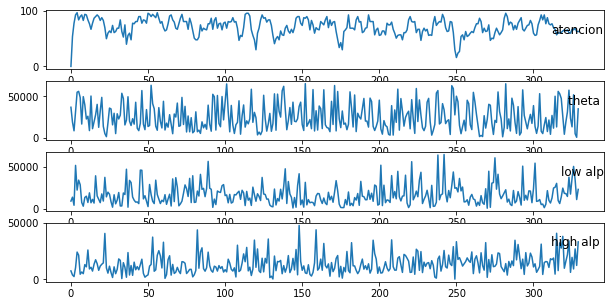

In [244]:
groups = [0,1,2,3]
i = 1
# plot each column
plt.figure(figsize=(10,5))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(df.values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

Filtro - Suavizado exponencial

In [246]:
from pandas.core.indexes.numeric import Float64Index
from pandas.core.arrays.datetimelike import round_nsint64
import numpy as np
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

errores=[]
for i in np.arange(0,1.1,0.1):
  i=round(i,1)
  f1=SimpleExpSmoothing(signal1).fit(smoothing_level=i, optimized=False)
  r1=f1.fittedvalues
  df1['Pronostico alfa='+str(i)]=r1
  f2=SimpleExpSmoothing(signal2).fit(smoothing_level=i, optimized=False)
  r2=f2.fittedvalues
  df2['Pronostico alfa='+str(i)]=r2
  f3=SimpleExpSmoothing(signal3).fit(smoothing_level=i, optimized=False)
  r3=f3.fittedvalues
  df3['Pronostico alfa='+str(i)]=r3
  f4=SimpleExpSmoothing(signal4).fit(smoothing_level=i, optimized=False)
  r4=f4.fittedvalues
  df4['Pronostico alfa='+str(i)]=r4
  

  
  #df['Error alfa= '+str(i)]= df['TIME']-df['Pronostico alfa='+str(i)]
  #df['Error2 alfa= '+str(i)]= pow(df['Error alfa= '+str(i)],2)
  #suma=df['Error2 alfa= '+str(i)].sum()
  #df.plot(x='TIME',y='Pronostico alfa='+str(i),ax=ax)
  #errores.append(suma)
print(errores)

[]


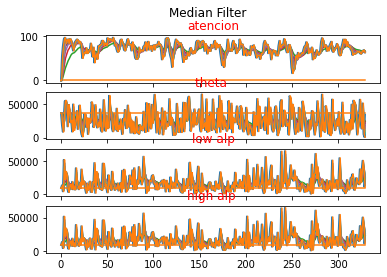

In [247]:
f, plt_arr =plt.subplots(4,sharex=True)
f.suptitle('Median Filter')

plt_arr[0].plot(df1)
plt_arr[0].set_title("atencion", color ='red')

plt_arr[1].plot(df2)
plt_arr[1].set_title("theta ", color ='red')

plt_arr[2].plot(df3)
plt_arr[2].set_title("low alp", color ='red')

plt_arr[3].plot(df3)
plt_arr[3].set_title("high alp ", color ='red')

plt.show()

#df1.plot(figsize=(15,10))
#df2['Pronostico alfa=0.2'].plot(figsize=(15,10))
#df3.plot(figsize=(15,10))

Filtro - Media movil

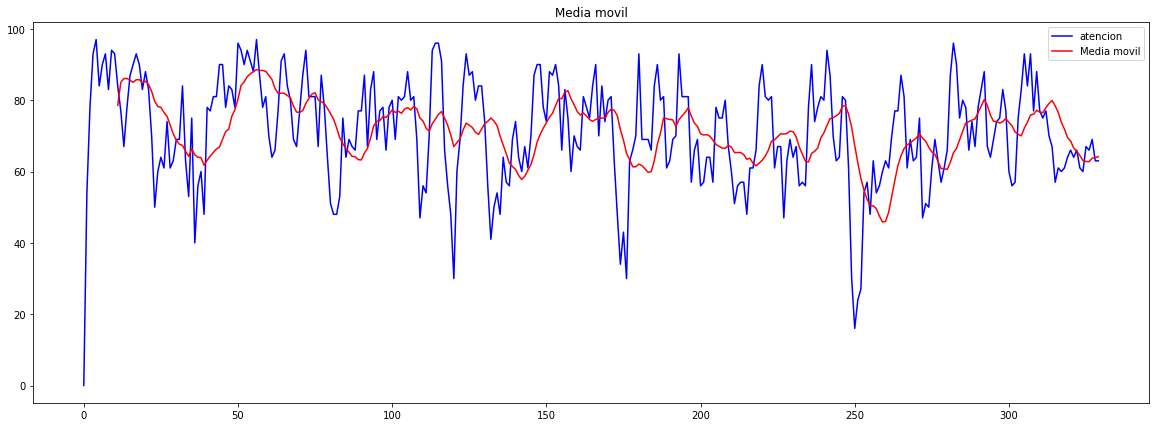

In [248]:
moving_avg1 = pd.Series(signal1).rolling(window=12).mean()
moving_avg2 = pd.Series(signal2).rolling(window=12).mean()
moving_avg3 = pd.Series(signal3).rolling(window=12).mean()
moving_avg4 = pd.Series(signal4).rolling(window=12).mean()
 

df1['atencion'].plot(figsize=(20,7),color='blue')
moving_avg1[:500].plot(label='Media movil',color='red')
plt.title('Media movil')
plt.legend(loc='best')

#df1['atencion'][:500].plot(figsize=(20,7),color='blue')
#moving_avg1[:500].plot(label='Media movil',color='red')
#plt.title('Filtro Media movil')
#plt.legend(loc='best')
#ylabel('mV')
#xlabel('t')

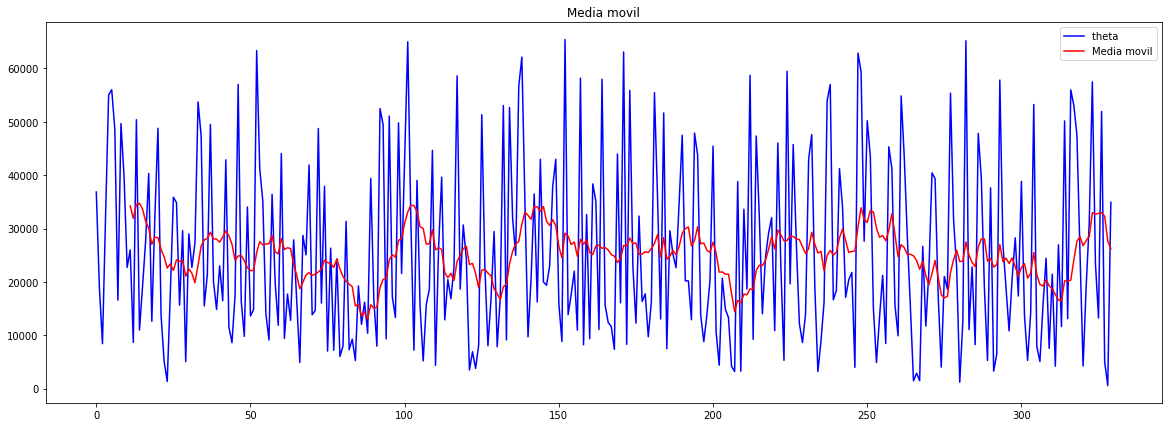

In [249]:
df2['theta '].plot(figsize=(20,7),color='blue')
moving_avg2[:500].plot(label='Media movil',color='red')
plt.title('Media movil')
plt.legend(loc='best')

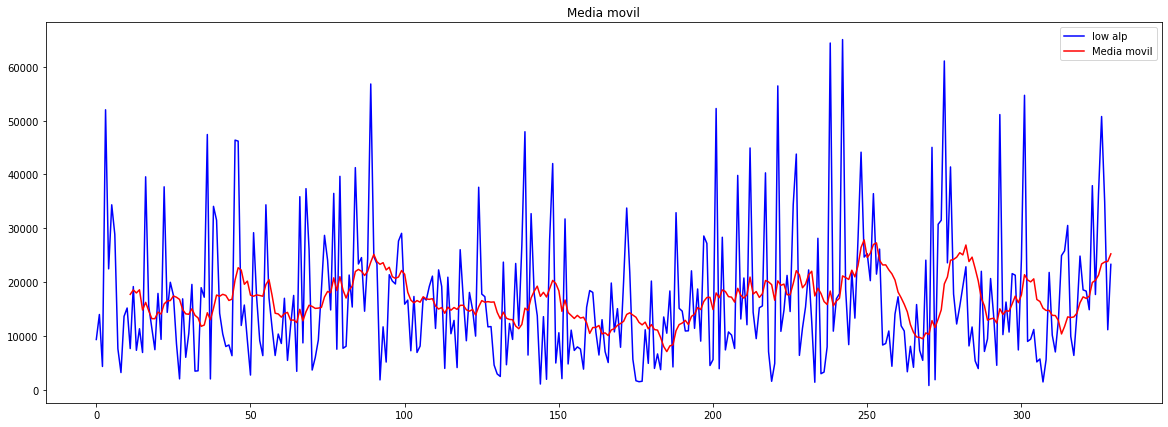

In [250]:
df3['low alp'].plot(figsize=(20,7),color='blue')
moving_avg3[:500].plot(label='Media movil',color='red')
plt.title('Media movil')
plt.legend(loc='best')


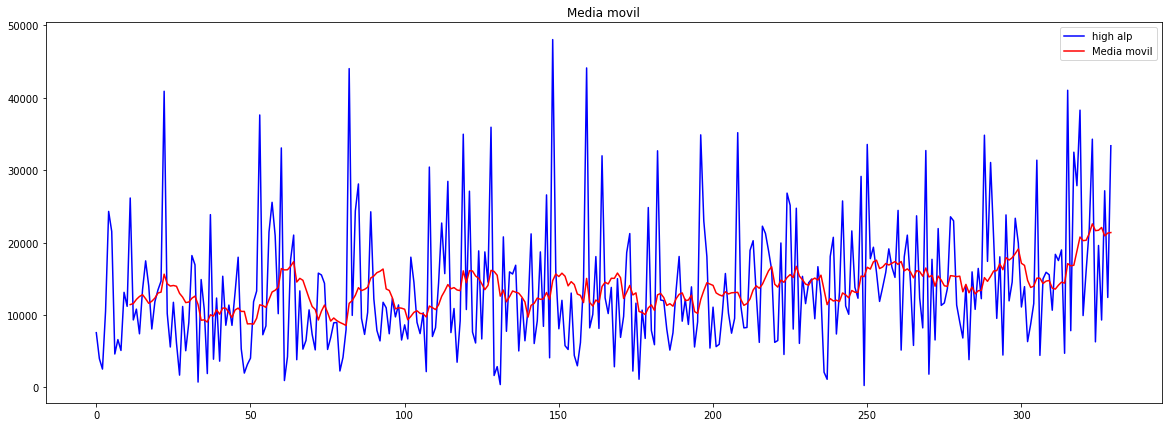

In [251]:
#@title Texto de título predeterminado
variable_name = ""
df4['high alp '].plot(figsize=(20,7),color='blue')
moving_avg4.plot(label='Media movil',color='red')
plt.title('Media movil')
plt.legend(loc='best')

In [252]:
df5=pd.DataFrame()
df5['atencion']=moving_avg1
df5['theta']=moving_avg2
df5['low alp']=moving_avg3
df5['high alp']=moving_avg4
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('MediaMovil.csv')
df5.describe()

,atencion,theta,low alp,high alp
count,319.000000,319.000000,319.000000,319.000000
mean,71.383751,25174.363114,16768.615465,13696.135841
std,7.918068,4394.809116,3987.433008,2623.199940
min,45.833333,13034.583333,7071.250000,8542.250000
25%,65.666667,22257.583333,13924.000000,11876.416667
50%,72.166667,25493.666667,16556.916667,13440.500000
75%,76.583333,27890.666667,19527.958333,15303.083333
max,88.583333,34729.833333,27829.666667,22587.083333


Filtro - Savitzky golay

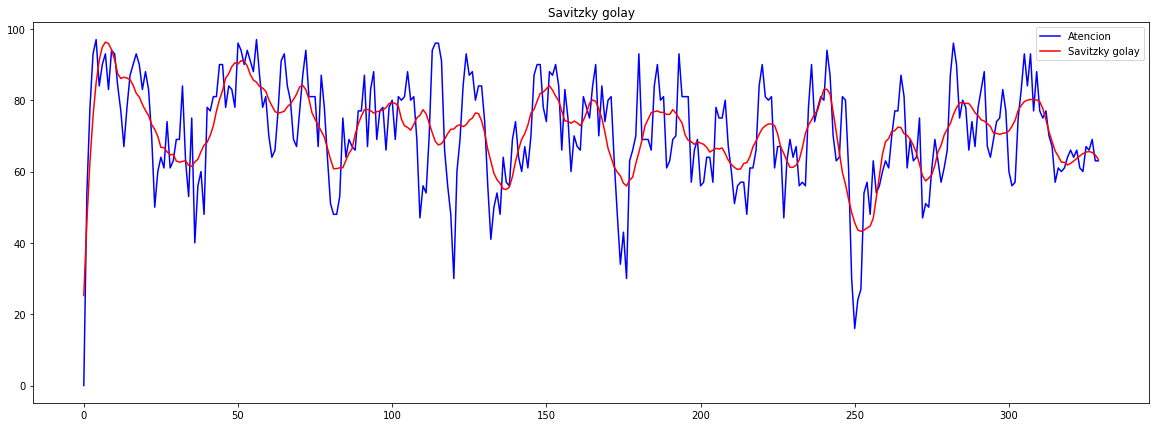

In [254]:
#@title Texto de título predeterminado
from scipy.signal import savgol_filter
np.set_printoptions(precision=2)  # For compact display.
#5,2
#51,3

SG1=savgol_filter(signal1, 21, 3)
df1['atencion']=SG1
SG2=savgol_filter(signal2, 21, 3)
df2['theta']=SG2
SG3=savgol_filter(signal3, 21, 3)
df3['low alp']=SG3
SG4=savgol_filter(signal4, 21, 3)
df4['high alp']=SG4

#df1['SG1'][:500].plot(figsize=(20,7),color='blue')
signal1[:500].plot(figsize=(20,7),label='Atencion',color='blue')
df1['atencion'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')



0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
325    32828.083333
326    32976.083333
327    32295.833333
328    27676.833333
329    26161.750000
Name: theta , Length: 330, dtype: float64

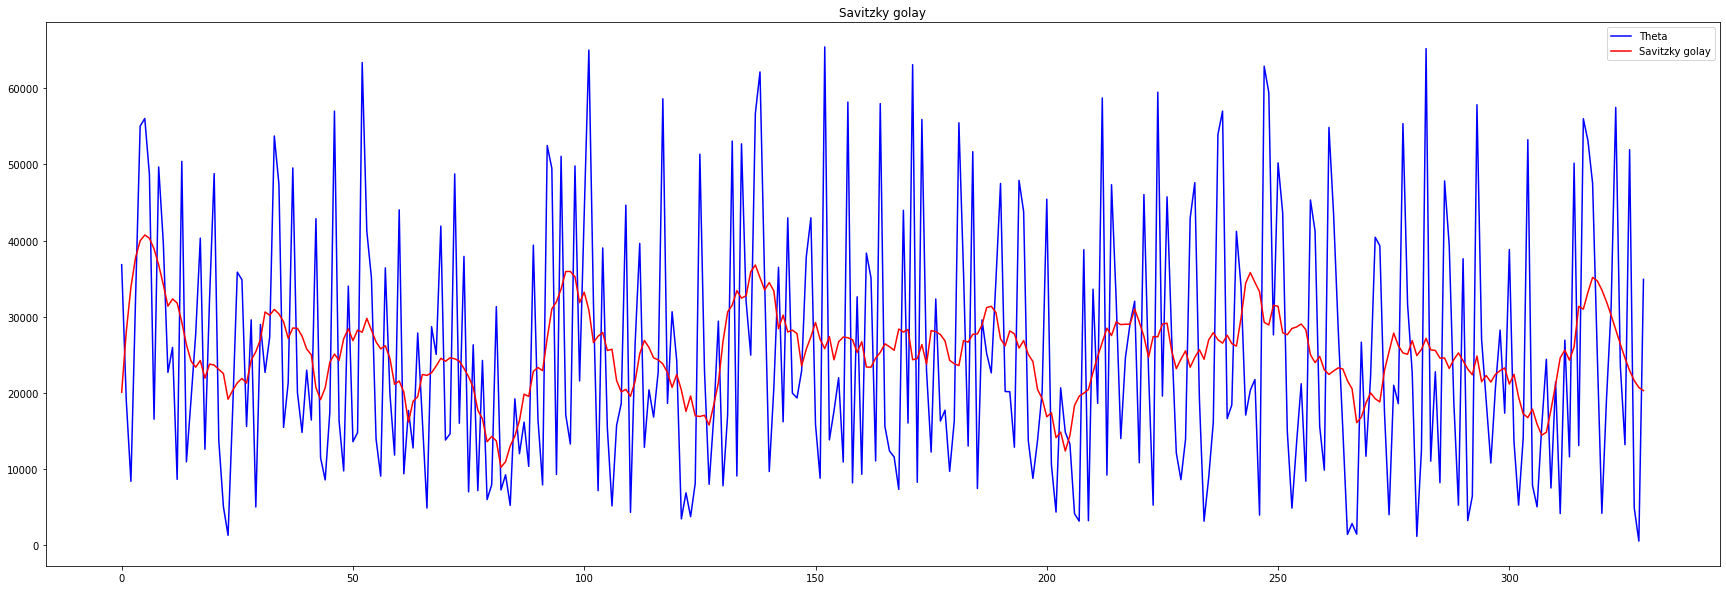

In [256]:
#df2['SG2'].plot(figsize=(25,10),color='violet')
signal2.plot(figsize=(30,10),label='Theta',color='blue')
df2['theta'].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')
moving_avg2

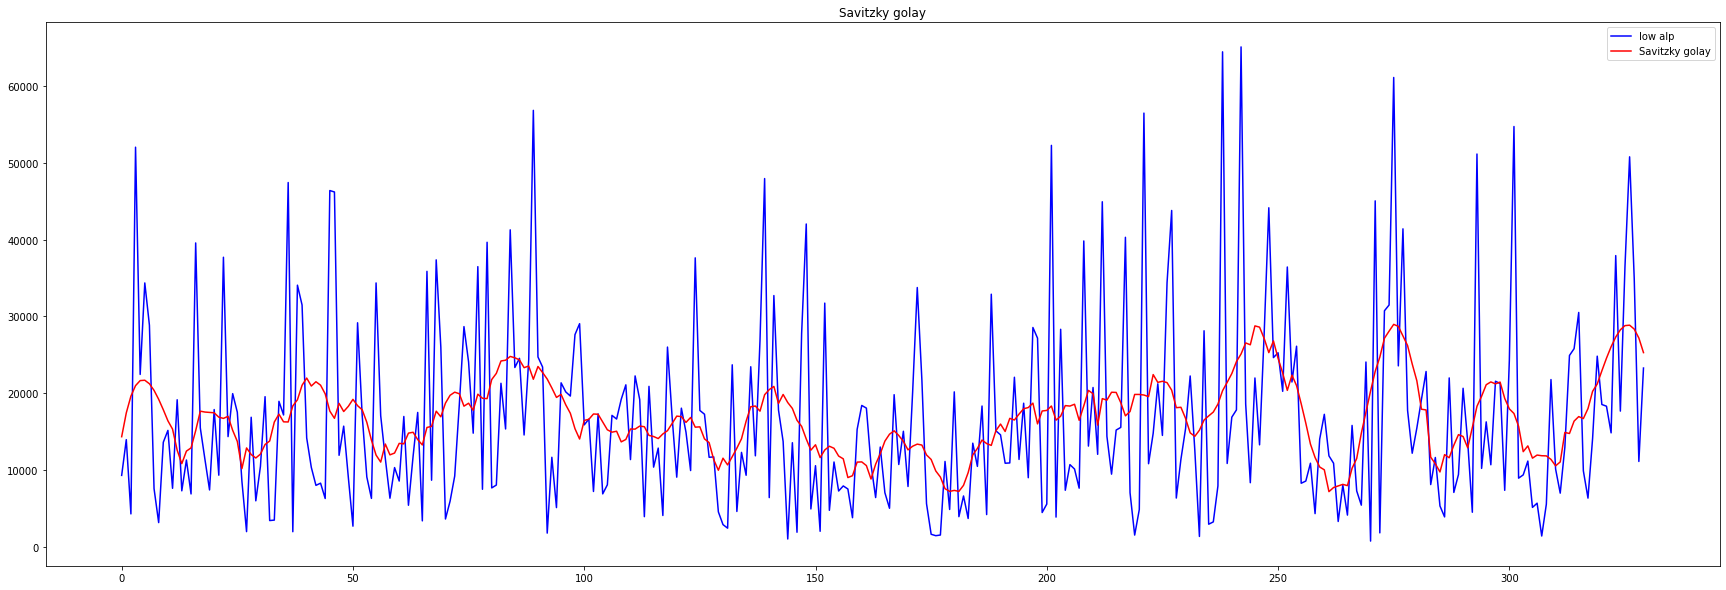

In [260]:
#@title Texto de título predeterminado
variable_name = ""
#df3['SG3'][:500].plot(figsize=(25,10),color='violet')
signal3[:500].plot(figsize=(30,10),label='low alp',color='blue')
df3['low alp'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

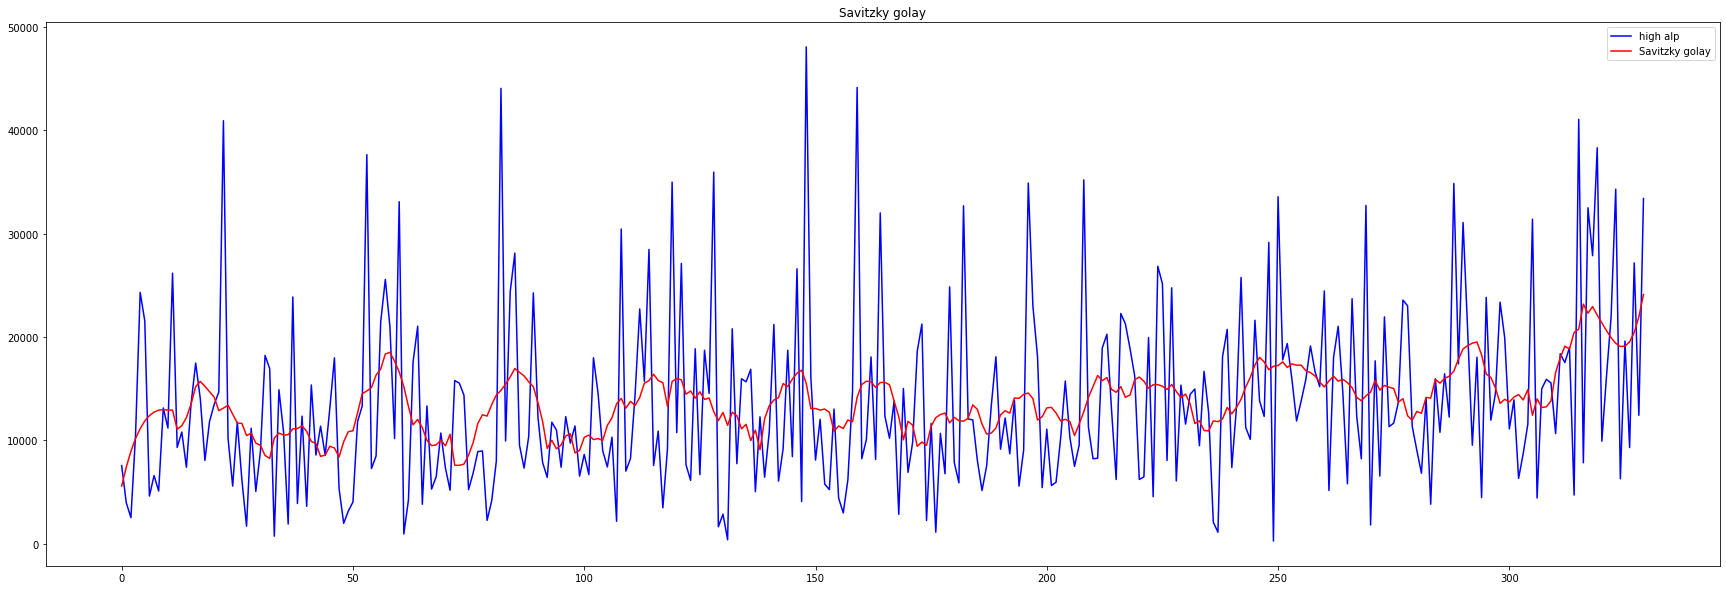

In [261]:
variable_name = ""
#df4['SG4'][:500].plot(figsize=(25,10),color='violet')
signal4[:500].plot(figsize=(30,10),label='high alp',color='blue')
df4['high alp'][:500].plot(label='Savitzky golay',color='red')
plt.title('Savitzky golay')
plt.legend(loc='best')

In [262]:
#@title Texto de título predeterminado
df5=pd.DataFrame()
df5['atencion']=SG1
df5['theta']=SG2
df5['low alp']=SG3
df5['high alp']=SG4
df5[30:50].head()
#Genera una matrix nueva
df5.to_csv('BDDFSG.csv')
df5.describe()

,atencion,theta,low alp,high alp
count,330.000000,330.000000,330.000000,330.000000
mean,71.286009,25311.514978,17017.108638,13732.578807
std,9.789638,5287.659020,4764.261038,3036.978649
min,25.238189,10245.932004,7204.588101,5571.253623
25%,65.085077,22401.714204,13434.684701,11632.358859
50%,72.339327,25372.442955,16875.283426,13663.352239
75%,77.272148,28252.119565,19876.549199,15598.435518
max,96.295039,40742.505136,28966.874469,24102.043666


Filtro FIR

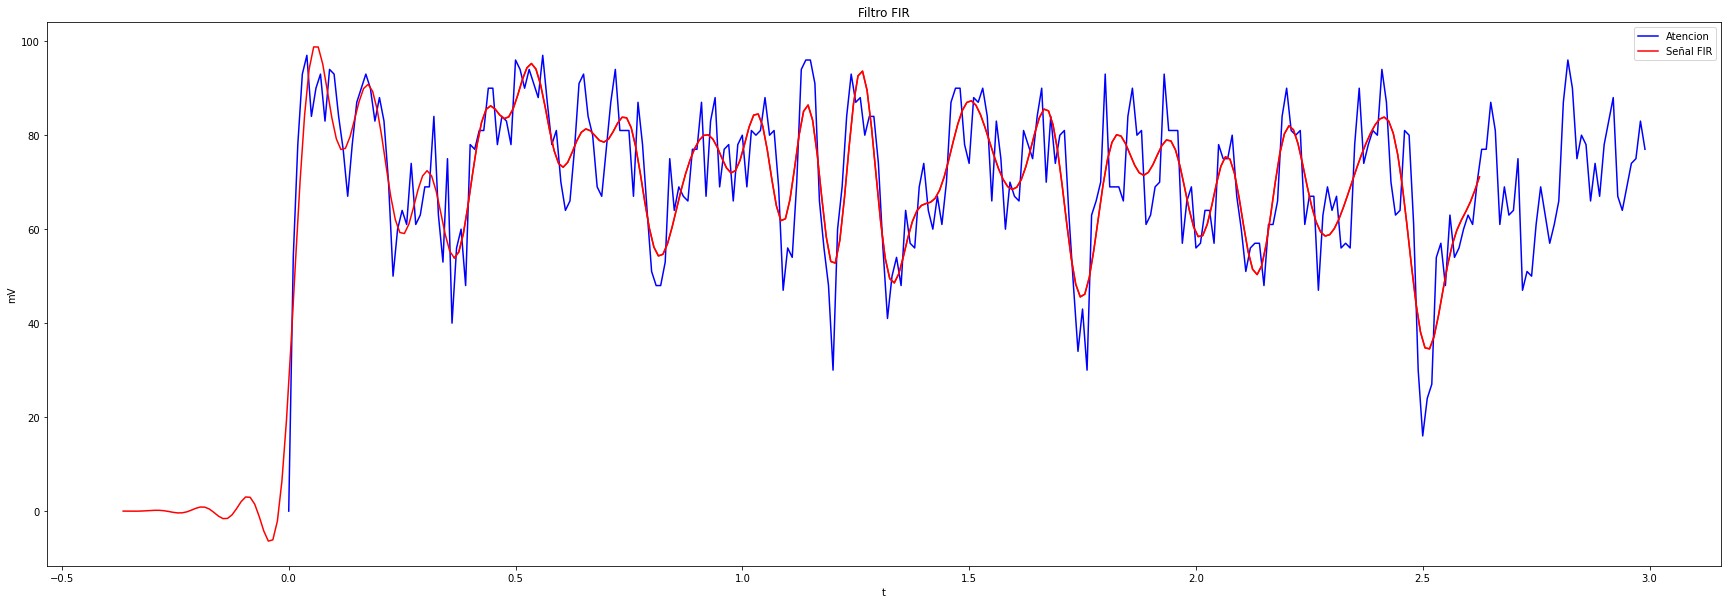

In [263]:
from numpy import pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, xlabel, ylabel, title, show, get_figlabels
from pylab import *
import matplotlib
from matplotlib import pylab, mlab, pyplot

sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal1)
df1['FIR1']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal1[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Atencion', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()


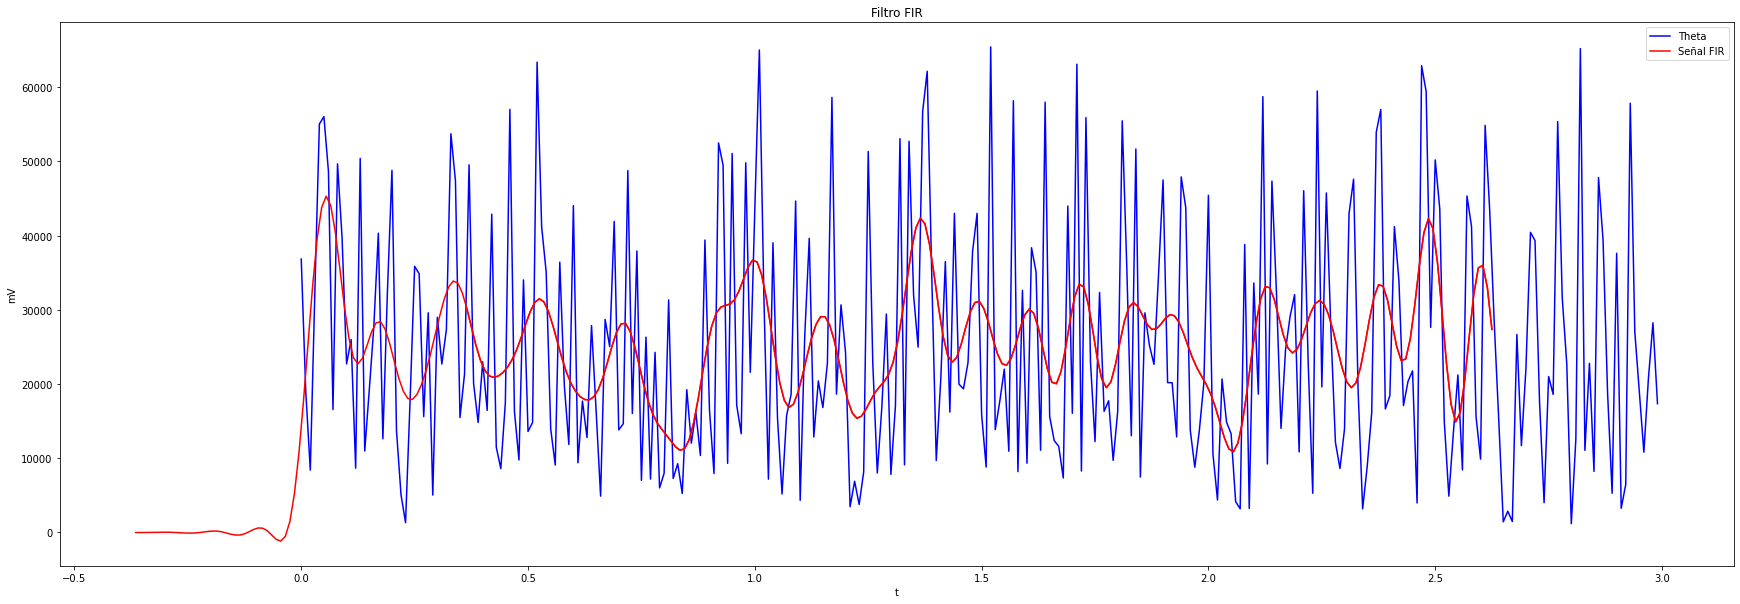

In [264]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal2)
df2['FIR2']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal2[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Theta', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

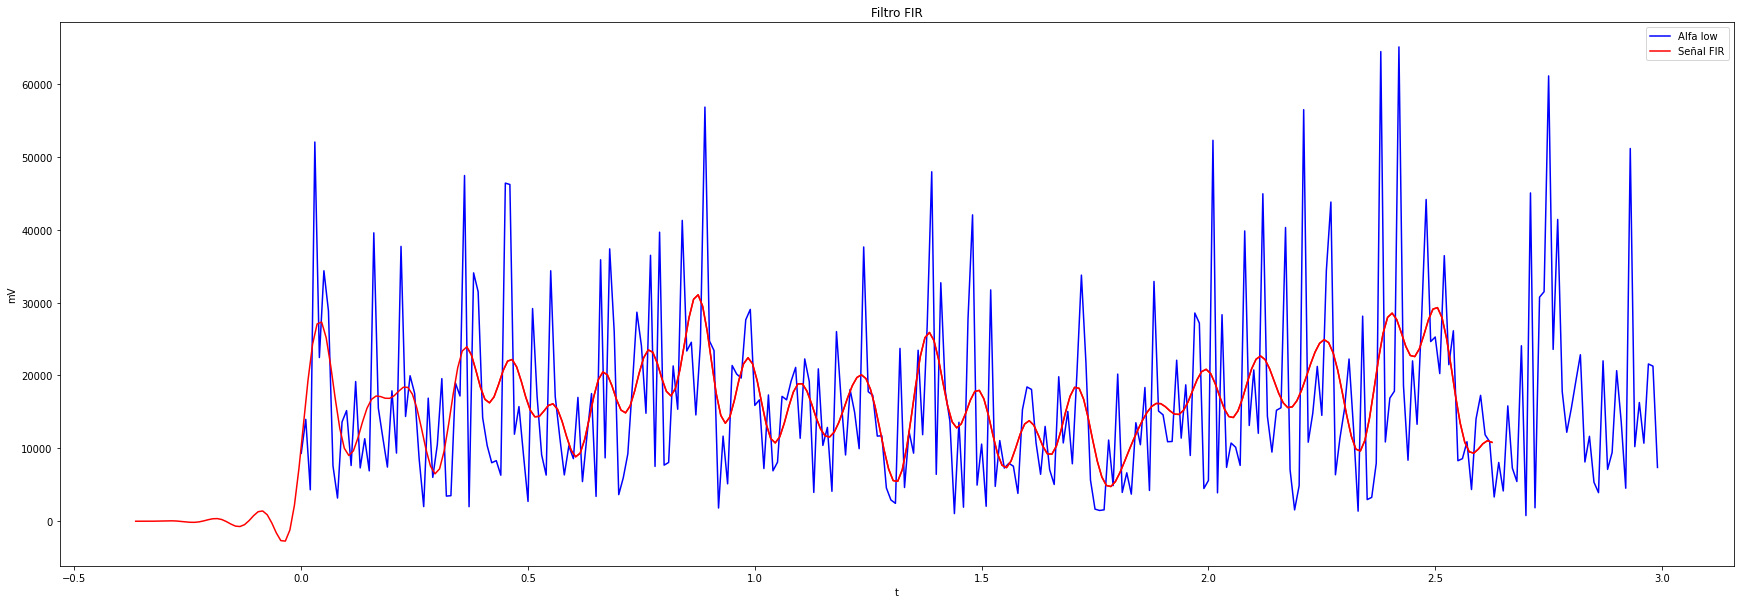

In [265]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal3)
df3['FIR3']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal3[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Alfa low', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

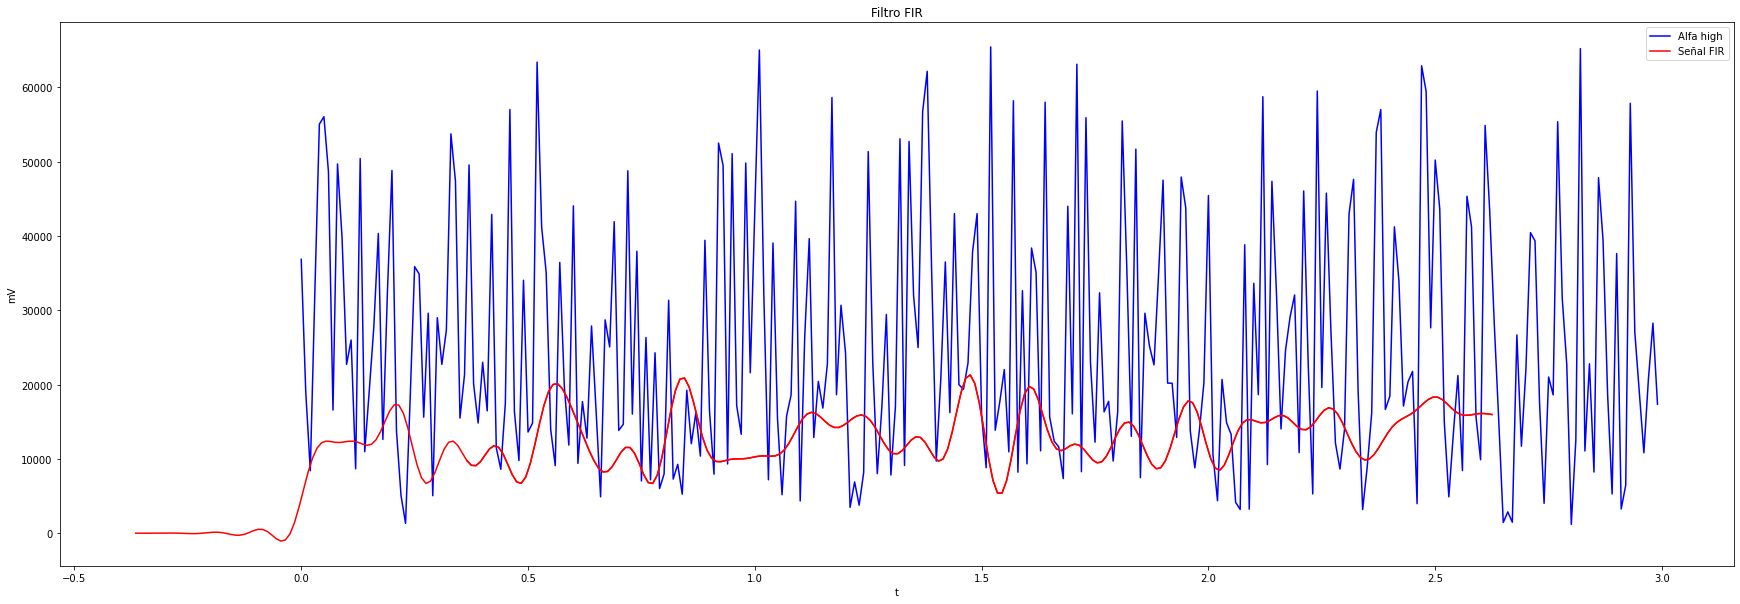

In [266]:
sample_rate = 100.0
nsamples = 300
t = arange(nsamples) / sample_rate

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------
# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate
# The desired attenuation in the stop band, in dB.
ripple_db = 60.0
# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)
# The cutoff frequency of the filter.
cutoff_hz = 10.0
# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, signal4)
df4['FIR4']=filtered_x
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
filtered_x =filtered_x 
# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(figsize=(30,10))
# Plot the original signal.
plot(t, signal2[:300],color='blue')
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t-delay, filtered_x[:300],color='red')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:]-delay, filtered_x[N-1:][:227], color='red')
ylabel('mV')
xlabel('t')
title('Filtro FIR')
legend(('Alfa high', 'Señal FIR'),
prop = {'size': 10}, loc='upper right')
show()

In [267]:
df11=pd.DataFrame()
df11['atencion']=df1['FIR1']
df11['theta']=df2['FIR2']
df11['Alfa low']=df3['FIR3']
df11['Alfa high']=df4['FIR4']
df11.describe()

,atencion,theta,Alfa low,Alfa high
count,330.000000,330.000000,330.000000,330.000000
mean,63.437295,22627.677672,14899.334221,11773.078479
std,25.309479,10145.339279,7705.631975,5295.753696
min,-6.381544,-1158.442085,-2725.579766,-1060.624825
25%,58.451773,18846.263724,10297.751567,9799.065656
50%,71.417022,24207.118654,15638.067359,12235.000883
75%,79.208197,29075.392277,19533.665857,15531.416776
max,98.787980,45306.586957,34910.954138,22453.078473
